In [63]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as col
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
unique_mls = 'unique_mls_db.csv'
df = pd.read_csv(unique_mls, na_values='NULL')
df.head(5)

,mlsno,status,stno,stname,sttype,city,city_number,area,askprice,inputdate,...,type_number,style,bdrm,wshrm,latitude,longitude,house_condo,maint,aptno,address
0,C3320792,Sld,386,Eglinton,Ave,Toronto C10,23,Mount Pleasant East,615000,20/09/2015,...,8,Other,0,0,43.709510,-79.386210,house,NaN,NaN,"386 Eglinton Ave, Toronto"
1,C3683457,Sld,139,Christie,St,Toronto C02,36,Annex,499000,10/01/2017,...,1,Bungalow,2,1,43.667104,-79.419657,house,NaN,NaN,"139 Christie St, Toronto"
2,N3517852,Sld,200,Clark,Ave,Markham,2,Thornhill,699000,06/06/2016,...,1,Bungalow,1,1,43.811380,-79.404360,house,NaN,NaN,"200 Clark Ave, Markham"
3,C3686117,Sld,19,Addison,Cres,Toronto C13,54,Banbury-Don Mills,999000,15/01/2017,...,1,Bungalow,3,1,43.743602,-79.351473,house,NaN,NaN,"19 Addison Cres, Toronto"
4,C3697674,Sld,183,Bestview,Dr,Toronto C15,42,Bayview Woods-Steeles,988800,31/01/2017,...,1,2-Storey,4,4,43.805546,-79.383136,house,NaN,NaN,"183 Bestview Dr, Toronto"


In [2]:
df.drop(df.columns[[0,1,4,20,21]], axis=1, inplace=True)

In [3]:
df.head(5)

,stno,stname,city,city_number,area,askprice,inputdate,soldprice,solddate,type,type_number,style,bdrm,wshrm,latitude,longitude,house_condo,address
0,386,Eglinton,Toronto C10,23,Mount Pleasant East,615000,20/09/2015,1925000,20/10/2015,Vacant Land,8,Other,0,0,43.709510,-79.386210,house,"386 Eglinton Ave, Toronto"
1,139,Christie,Toronto C02,36,Annex,499000,10/01/2017,988018,16/01/2017,Detached,1,Bungalow,2,1,43.667104,-79.419657,house,"139 Christie St, Toronto"
2,200,Clark,Markham,2,Thornhill,699000,06/06/2016,1375000,13/06/2016,Detached,1,Bungalow,1,1,43.811380,-79.404360,house,"200 Clark Ave, Markham"
3,19,Addison,Toronto C13,54,Banbury-Don Mills,999000,15/01/2017,1958000,21/01/2017,Detached,1,Bungalow,3,1,43.743602,-79.351473,house,"19 Addison Cres, Toronto"
4,183,Bestview,Toronto C15,42,Bayview Woods-Steeles,988800,31/01/2017,1929999,14/02/2017,Detached,1,2-Storey,4,4,43.805546,-79.383136,house,"183 Bestview Dr, Toronto"


In [4]:
len(df['city'].value_counts())

56

In [5]:
df.dtypes

stno            object
stname          object
city            object
city_number      int64
area            object
askprice         int64
inputdate       object
soldprice        int64
solddate        object
type            object
type_number      int64
style           object
bdrm             int64
wshrm            int64
latitude       float64
longitude      float64
house_condo     object
address         object
dtype: object

In [6]:
df['inputdate'] = pd.to_datetime(df.inputdate)
df['solddate'] = pd.to_datetime(df.solddate)

In [7]:
df.dtypes

stno                   object
stname                 object
city                   object
city_number             int64
area                   object
askprice                int64
inputdate      datetime64[ns]
soldprice               int64
solddate       datetime64[ns]
type                   object
type_number             int64
style                  object
bdrm                    int64
wshrm                   int64
latitude              float64
longitude             float64
house_condo            object
address                object
dtype: object

In [8]:
df.describe()

,city_number,askprice,soldprice,type_number,bdrm,wshrm,latitude,longitude
count,195494.000000,1.954940e+05,1.954940e+05,195494.000000,195494.000000,195494.000000,195494.000000,195494.000000
mean,20.175872,7.384907e+05,7.651377e+05,2.885495,2.830987,2.653263,43.727477,-79.468912
std,15.498136,5.648553e+05,5.620668e+05,2.652589,1.096838,1.238405,0.136503,0.233172
min,0.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,43.288120,-80.127424
25%,6.000000,4.290000e+05,4.390000e+05,1.000000,2.000000,2.000000,43.642451,-79.650354
50%,15.000000,5.999000e+05,6.310000e+05,1.000000,3.000000,2.000000,43.721190,-79.446030
75%,34.000000,8.498000e+05,8.880000e+05,6.000000,4.000000,3.000000,43.822981,-79.345323
max,55.000000,2.680000e+07,2.200000e+07,35.000000,9.000000,35.000000,44.155510,-78.687984


In [9]:
len(df['style'].value_counts())

29

In [10]:
house_styles = df.groupby('style')
house_styles.size()

style
1 1/2 Stor             6
1 1/2 Storey        2424
2 1/2 Stor             1
2 1/2 Storey        1954
2 Storey               1
2-Store                2
2-Storey           91249
3-Store                1
3-Storey           10757
Apartme               11
Apartment          52748
Bachelor/Studio      218
                   ...  
Bungaloft            639
Bungalow           16628
Bungalow-Raised     3590
Loft                1980
Multi-Level         1910
Other                522
Sidesplit              1
Sidesplit 3         1003
Sidesplit 4         1586
Sidesplit 5          273
Sidesplt-All           1
Stacked Townhse     2319
Length: 29, dtype: int64

In [51]:
df.head()

,stno,stname,city,city_number,area,askprice,inputdate,soldprice,solddate,type,type_number,style,bdrm,wshrm,latitude,longitude,house_condo,address
0,386,Eglinton,Toronto C10,23,Mount Pleasant East,615000,2015-09-20,1925000,2015-10-20,Vacant Land,8,Other,0,0,43.709510,-79.386210,house,"386 Eglinton Ave, Toronto"
1,139,Christie,Toronto C02,36,Annex,499000,2017-10-01,988018,2017-01-16,Detached,1,Bungalow,2,1,43.667104,-79.419657,house,"139 Christie St, Toronto"
2,200,Clark,Markham,2,Thornhill,699000,2016-06-06,1375000,2016-06-13,Detached,1,Bungalow,1,1,43.811380,-79.404360,house,"200 Clark Ave, Markham"
3,19,Addison,Toronto C13,54,Banbury-Don Mills,999000,2017-01-15,1958000,2017-01-21,Detached,1,Bungalow,3,1,43.743602,-79.351473,house,"19 Addison Cres, Toronto"
4,183,Bestview,Toronto C15,42,Bayview Woods-Steeles,988800,2017-01-31,1929999,2017-02-14,Detached,1,2-Storey,4,4,43.805546,-79.383136,house,"183 Bestview Dr, Toronto"


In [11]:
len(df['house_condo'].value_counts())

2

In [17]:
house_condo = df.groupby('house_condo')
house_condo.size()

house_condo
condo     72341
house    123153
dtype: int64

In [20]:
df.shape

(195494, 18)

In [41]:
threebedrooms = []
for bedrooms in df.bdrm:
    if bedrooms >= 3:
        threebedrooms.append(True)
    else:
        threebedrooms.append(False)  

In [42]:
threebedrooms[0:10]

[False, False, False, True, True, True, False, True, False, True]

In [45]:
condo_list = []
for housecondo in df.house_condo:
    if housecondo=='condo':
        condo_list.append(True)
    else:
        condo_list.append(False)

In [46]:
condo_list[0:10]

[False, False, False, False, False, False, False, False, False, False]

In [47]:
len(condo_list)

195494

In [53]:
condolist = df.house_condo=='condo'

In [55]:
condolist.head()

0    False
1    False
2    False
3    False
4    False
Name: house_condo, dtype: bool

In [57]:
condo = df[condolist]

In [60]:
condo.shape

(72341, 18)

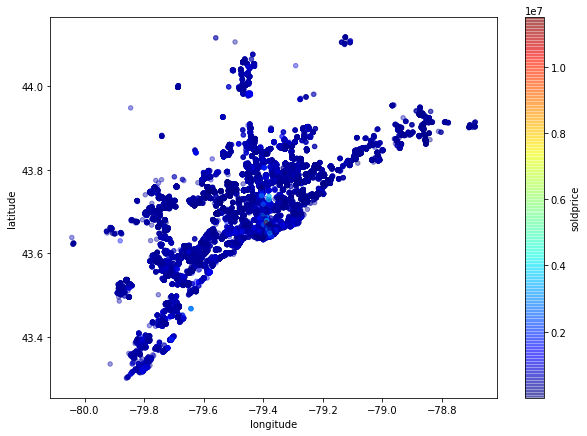

In [64]:
condo.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), c="soldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [65]:
freq = condo.groupby('city').count()['address']
mean = condo.groupby('city').mean()['soldprice']
cluster = pd.concat([freq, mean], axis=1)
cluster['neighborhood'] = cluster.index
cluster.columns = ['freq', 'soldprice', 'city']

cluster.describe()

,freq,soldprice
count,56.000000,5.600000e+01
mean,1291.803571,4.431891e+05
std,2133.973233,1.558168e+05
min,1.000000,2.405039e+05
25%,326.750000,3.380688e+05
50%,592.500000,4.116048e+05
75%,1246.250000,4.791379e+05
max,11836.000000,1.019435e+06


In [66]:
cluster1 = cluster[cluster.soldprice < 411600]
cluster1.index

Index(['Ajax', 'Brampton', 'Clarington', 'East Gwillimbury', 'Halton Hills',
       'Milton', 'Mississauga', 'Oshawa', 'Pickering', 'Toronto C06',
       'Toronto C11', 'Toronto C13', 'Toronto E03', 'Toronto E04',
       'Toronto E05', 'Toronto E07', 'Toronto E08', 'Toronto E09',
       'Toronto E10', 'Toronto E11', 'Toronto W03', 'Toronto W04',
       'Toronto W05', 'Toronto W08', 'Toronto W09', 'Toronto W10', 'Uxbridge',
       'Whitby'],
      dtype='object', name='city')

In [67]:
cluster_temp = cluster[cluster.soldprice >= 411600]
cluster2 = cluster_temp[cluster_temp.freq <592]
cluster2.index

Index(['Aurora', 'Caledon', 'King', 'Newmarket', 'Toronto C03', 'Toronto C04',
       'Toronto C09', 'Toronto C12', 'Toronto E01', 'Toronto E02',
       'Toronto E06', 'Toronto W07', 'Whitchurch-Stouffville'],
      dtype='object', name='city')

In [68]:
cluster3 = cluster_temp[cluster_temp.freq >=592]
cluster3.index

Index(['Burlington', 'Markham', 'Oakville', 'Richmond Hill', 'Toronto C01',
       'Toronto C02', 'Toronto C07', 'Toronto C08', 'Toronto C10',
       'Toronto C14', 'Toronto C15', 'Toronto W01', 'Toronto W02',
       'Toronto W06', 'Vaughan'],
      dtype='object', name='city')

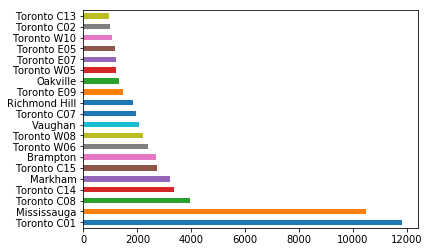

In [69]:
condo['city'].value_counts()[:20].plot(kind='barh')

In [70]:
condo.inputdate.min(), condo.inputdate.max()

(Timestamp('2010-09-12 00:00:00'), Timestamp('2017-12-06 00:00:00'))

In [76]:
condo.inputdate.dt.weekday_name[:5]

17      Friday
25      Monday
30    Thursday
68    Saturday
73    Saturday
Name: inputdate, dtype: object

In [106]:
ts = pd.to_datetime('1/1/2017')

In [107]:
recent_sales = []
for inputdate in condo.inputdate:
    if inputdate >= ts:
        recent_sales.append(True)
    else:
        recent_sales.append(False) 

In [108]:
recent_sales[10000:10010]

[True, False, True, True, False, False, False, False, False, False]

In [109]:
recent_condos = condo.inputdate>=ts
less_1m = condo.soldprice<1000000

In [110]:
recent_condos.head()

17    True
25    True
30    True
68    True
73    True
Name: inputdate, dtype: bool

In [111]:
less_1m.head()

17    True
25    True
30    True
68    True
73    True
Name: soldprice, dtype: bool

In [112]:
rcndo =  condo[recent_condos][less_1m]

/Users/Minh/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [113]:
rcndo.shape

(17766, 18)

In [114]:
rcndo.head()

,stno,stname,city,city_number,area,askprice,inputdate,soldprice,solddate,type,type_number,style,bdrm,wshrm,latitude,longitude,house_condo,address
17,28,Rosebank,Toronto E11,41,Malvern,360000,2017-03-03,651000,2017-12-03,Condo Townhouse,5,3-Storey,3,3,43.792121,-79.235722,condo,"28 Rosebank Dr, Toronto"
25,68,Grangeway,Toronto E09,10,Woburn,359000,2017-12-04,638000,2017-04-20,Condo Apt,6,Apartment,2,2,43.773592,-79.249762,condo,"68 Grangeway Ave, Toronto"
30,25,Sunrise,Toronto C13,54,Victoria Village,199000,2017-01-05,350000,2017-08-05,Condo Apt,6,Apartment,2,2,43.718934,-79.301738,condo,"25 Sunrise Ave, Toronto"
68,2088,Lawrence,Toronto W04,16,Weston,249000,2017-08-05,416500,2017-05-14,Condo Apt,6,Apartment,3,2,43.699760,-79.518492,condo,"2088 Lawrence Ave, Toronto"
73,2088,Lawrence,Toronto W04,16,Weston,249000,2017-08-05,415500,2017-05-14,Condo Apt,6,Apartment,3,2,43.699760,-79.518492,condo,"2088 Lawrence Ave, Toronto"


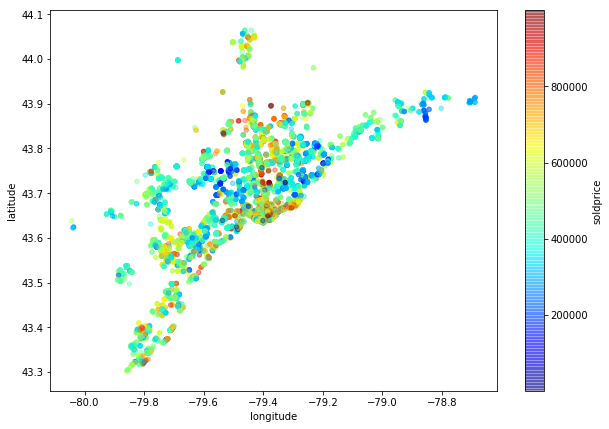

In [115]:
rcndo.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), c="soldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [116]:
cse = df.address=='101 Charles St E, Toronto'

In [117]:
charles_st_e = df[cse]

In [118]:
charles_st_e.shape

(0, 18)